In [1]:
# Imports
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import pandas as pd

In [2]:
import gc
gc.collect()

0

In [3]:
# Read from train.txt , test.txt, validation.txt 0 and 1

label={0:'without mask', 1:'with mask'}

# Train
yTrain = []
wavTrainNameFiles = []
f = open("ml-fmi-23-2020\\train.txt", "r")
for line in f:
    x = line.split(",")
    wavTrainNameFiles.append("ml-fmi-23-2020\\train\\train\\" + x[0])
    yTrain.append(int(x[1][0]))
yTrain = np.array(yTrain)

# Validation
yValidation = []
wavValidationNameFiles = []
f = open("ml-fmi-23-2020\\validation.txt", "r")
for line in f:
    x = line.split(",")
    wavValidationNameFiles.append("ml-fmi-23-2020\\validation\\validation\\"+x[0])
    yValidation.append(int(x[1][0]))
yValidation = np.array(yValidation)

# Test
wavTestNameFiles = []
fileNameTest = []
f = open("ml-fmi-23-2020\\test.txt", "r")
for line in f:
    x = line.split("\n")
    wavTestNameFiles.append("ml-fmi-23-2020\\test\\test\\"+x[0])
    fileNameTest.append(x[0])
print(wavTestNameFiles[:2])

['ml-fmi-23-2020\\test\\test\\301555.wav', 'ml-fmi-23-2020\\test\\test\\302850.wav']


[]

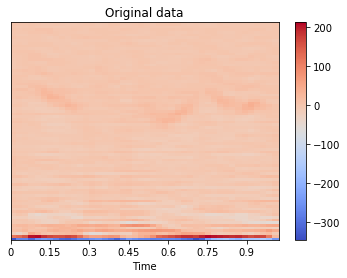

In [4]:
# Difference between original and preemphasis data
import librosa as lb
from librosa.display import specshow

# Original 
data, rate = lb.load(wavTrainNameFiles[10])
mfcc_feat = lb.feature.mfcc(data, rate, n_mfcc = 80)
specshow(mfcc_feat, x_axis='time')
plt.title("Original data")
plt.colorbar()
plt.plot()

[]

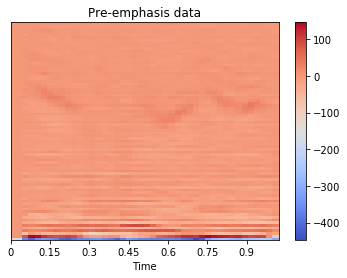

In [5]:
#  Preemphasis
data, rate = lb.load(wavTrainNameFiles[10])
data = lb.effects.preemphasis(data)
mfcc_feat = lb.feature.mfcc(data, rate, n_mfcc = 80)
specshow(mfcc_feat, x_axis='time')
plt.title("Pre-emphasis data")
plt.colorbar()
plt.plot()

In [4]:
# Read files

# from python_speech_features import mfcc
import librosa as lb
import sklearn

# Train files
TrainData = []
for i in range(len(wavTrainNameFiles)):
    data, rate = lb.load(wavTrainNameFiles[i]) # Load audio file 
    data = lb.effects.preemphasis(data) # Pre-emphasis the data
    mfcc_feat = lb.feature.mfcc(data, rate, n_mfcc = 80)  # Make MFCC
    mfcc_feat = sklearn.preprocessing.scale(mfcc_feat, axis = 0, with_mean = True) # Normalization
    TrainData.append(mfcc_feat.flatten())
 
gc.collect()

18012

In [5]:
gc.collect()
X_train = TrainData
del TrainData
gc.collect()
y_train = yTrain
del yTrain
gc.collect()

0

In [6]:
# Test files 
TestData = []
for i in range(len(wavTestNameFiles)):
    data, rate = lb.load(wavTestNameFiles[i]) # Load audio file 
    data = lb.effects.preemphasis(data) # Pre-emphasis the data
    mfcc_feat = lb.feature.mfcc(data, rate, n_mfcc = 80) # Make MFCC
    mfcc_feat = sklearn.preprocessing.scale(mfcc_feat, axis=0, with_mean = True) # Normalization
    TestData.append(mfcc_feat.flatten())

gc.collect()

728

In [7]:
X_test_final = TestData
del TestData
gc.collect()

20

In [8]:
# Validation files
ValidationData = []
for i in range(len(wavValidationNameFiles)):
    data, rate = lb.load(wavValidationNameFiles[i]) # Load audio file 
    data = lb.effects.preemphasis(data) # Pre-emphasis the data
    mfcc_feat = lb.feature.mfcc(data, rate, n_mfcc = 80) # Make MFCC
    mfcc_feat = sklearn.preprocessing.scale(mfcc_feat, axis=0, with_mean = True) # Normalization
    ValidationData.append(mfcc_feat.flatten())

gc.collect()

344

In [9]:
X_test = ValidationData
del ValidationData
gc.collect()
y_test = yValidation
del yValidation
gc.collect()

0

In [10]:
del wavTrainNameFiles, wavTestNameFiles, wavValidationNameFiles
gc.collect()

20

In [13]:
# Test models -------------------------------------------------------------

In [11]:
# To prevent overfitting, I will do predictions only on 50% of the validation data
from sklearn.model_selection import train_test_split
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test, y_test, test_size = 1/2)

In [12]:
del X_test, y_test
gc.collect()

40

In [ ]:
# GridSearchCV for SVC
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1, 100, 500, 1000, 2000]}]

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:\n")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:\n")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r\n"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:\n")
    print()
    print("The model is trained on the full development set.\n")
    print("The scores are computed on the full evaluation set.\n")
    print()
    y_test2, pred = y_test2, clf.predict(X_test2)
    print(confusion_matrix(y_test2, pred))
    print()
    print(classification_report(y_test2, pred))
    print()
    print(clf.score(X_test2, y_test2))
    print()
    print("----------------------------------------------------\n")
    gc.collect()


In [ ]:
# Tuning hyper-parameters for precision for X_test

Best parameters set found on development set:


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:


0.648 (+/-0.016) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

0.644 (+/-0.013) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

0.601 (+/-0.021) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

0.659 (+/-0.016) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

0.667 (+/-0.020) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

0.637 (+/-0.017) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

0.602 (+/-0.021) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}

0.659 (+/-0.016) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

0.649 (+/-0.016) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

0.644 (+/-0.011) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

0.635 (+/-0.019) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}


0.659 (+/-0.016) for {'C': 500, 'gamma': 0.01, 'kernel': 'rbf'}

0.651 (+/-0.019) for {'C': 500, 'gamma': 0.001, 'kernel': 'rbf'}

0.645 (+/-0.007) for {'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}

0.639 (+/-0.011) for {'C': 500, 'gamma': 1e-05, 'kernel': 'rbf'}

0.659 (+/-0.016) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

0.651 (+/-0.019) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

0.640 (+/-0.008) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

0.635 (+/-0.011) for {'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}

0.659 (+/-0.016) for {'C': 2000, 'gamma': 0.01, 'kernel': 'rbf'}

0.651 (+/-0.019) for {'C': 2000, 'gamma': 0.001, 'kernel': 'rbf'}

0.632 (+/-0.011) for {'C': 2000, 'gamma': 0.0001, 'kernel': 'rbf'}

0.633 (+/-0.004) for {'C': 2000, 'gamma': 1e-05, 'kernel': 'rbf'}


Detailed classification report:


The model is trained on the full development set.

The scores are computed on the full evaluation set.


[[309 163]
 [175 353]]

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       472
           1       0.68      0.67      0.68       528

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000


0.6612691395989494


In [35]:
# GridSearchCV for LogisticRegression on X_test2
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

tuned_parameters = {'penalty': ['l2'],'C':[0.001, 0.01, 1, 5, 10, 25]}

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        LogisticRegression(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:\n")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:\n")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r\n"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:\n")
    print()
    print("The model is trained on the full development set.\n")
    print("The scores are computed on the full evaluation set.\n")
    print()
    y_test2, pred = y_test2, clf.predict(X_test2)
    print(confusion_matrix(y_test2, pred))
    print()
    print(classification_report(y_test2, pred))
    print()
    print(clf.score(X_test2, y_test2))
    print()
    print("----------------------------------------------------\n")
    gc.collect()


# Tuning hyper-parameters for precision

Best parameters set found on development set:


{'C': 0.01, 'penalty': 'l2'}

Grid scores on development set:


nan (+/-nan) for {'C': 0.001, 'penalty': 'l1'}

0.634 (+/-0.019) for {'C': 0.001, 'penalty': 'l2'}

nan (+/-nan) for {'C': 0.01, 'penalty': 'l1'}

0.649 (+/-0.022) for {'C': 0.01, 'penalty': 'l2'}

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}

0.621 (+/-0.030) for {'C': 1, 'penalty': 'l2'}

nan (+/-nan) for {'C': 5, 'penalty': 'l1'}

0.624 (+/-0.025) for {'C': 5, 'penalty': 'l2'}

nan (+/-nan) for {'C': 10, 'penalty': 'l1'}

0.625 (+/-0.030) for {'C': 10, 'penalty': 'l2'}

nan (+/-nan) for {'C': 25, 'penalty': 'l1'}

0.623 (+/-0.025) for {'C': 25, 'penalty': 'l2'}


Detailed classification report:


The model is trained on the full development set.

The scores are computed on the full evaluation set.


[[149  94]
 [ 93 164]]

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       243
    

In [ ]:
# GridSearchCV for LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

tuned_parameters = {'penalty': ['l2'],'C':[0.001, 0.01, 1, 5, 10, 25]}

scores = ['precision']


# Tuning hyper-parameters for precision

Best parameters set found on development set:


{'C': 0.01, 'penalty': 'l2'}

Grid scores on development set:


nan (+/-nan) for {'C': 0.001, 'penalty': 'l1'}

0.634 (+/-0.019) for {'C': 0.001, 'penalty': 'l2'}

nan (+/-nan) for {'C': 0.01, 'penalty': 'l1'}

0.649 (+/-0.022) for {'C': 0.01, 'penalty': 'l2'}

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}

0.621 (+/-0.030) for {'C': 1, 'penalty': 'l2'}

nan (+/-nan) for {'C': 5, 'penalty': 'l1'}

0.624 (+/-0.025) for {'C': 5, 'penalty': 'l2'}

nan (+/-nan) for {'C': 10, 'penalty': 'l1'}

0.625 (+/-0.030) for {'C': 10, 'penalty': 'l2'}

nan (+/-nan) for {'C': 25, 'penalty': 'l1'}

0.623 (+/-0.025) for {'C': 25, 'penalty': 'l2'}


Detailed classification report:


The model is trained on the full development set.

The scores are computed on the full evaluation set.


[[149  94]
 [ 93 164]]

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       243
           1       0.64      0.64      0.64       257

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500


0.6256806970337625

----------------------------------------------------

In [15]:
# Fit the best models -----------------------------------------------------

In [13]:
gc.collect()


20

In [14]:
# The model with the best score on validation
from sklearn import svm 

regr = svm.SVC(C=10, gamma=0.001) 
regr.fit(X_train, y_train)  

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Make predictions
pred_test1 = regr.predict(X_test2)
pred_test2 = regr.predict(X_test1)
pred2 = regr.predict(X_test_final)

In [16]:
# Cross Validation
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(regr, X_test2, y_test2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print()
scores = cross_val_score(regr, X_test1, y_test1, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.55 (+/- 0.10)

Accuracy: 0.56 (+/- 0.07)


In [19]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test2, pred_test1)
# print(cm)
# print()
# cm = confusion_matrix(y_test1, pred_test2)
# print(cm)

Confusion matrix X_test1, without normalization
[[158  81]
 [ 78 183]]
Normalized confusion matrix X_test1
[[0.66 0.34]
 [0.3  0.7 ]]


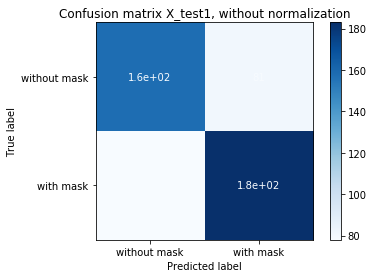

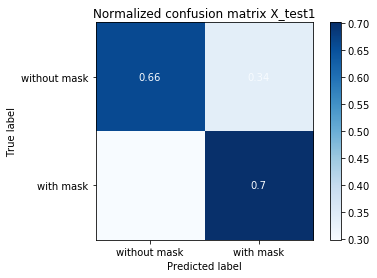

In [17]:
# Confusion Matrix for X_test1
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test1, without normalization", None),
                  ("Normalized confusion matrix X_test1", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test1, y_test1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Confusion matrix X_test2, without normalization
[[156  77]
 [ 84 183]]
Normalized confusion matrix X_test2
[[0.67 0.33]
 [0.31 0.69]]


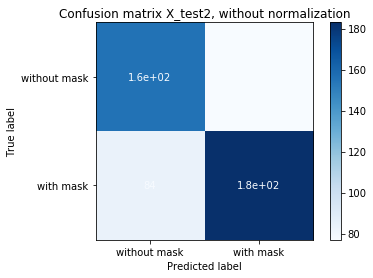

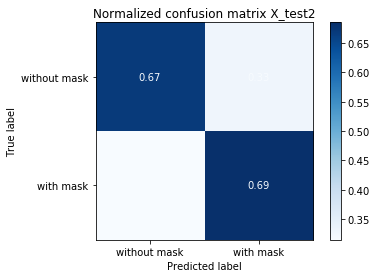

In [18]:
# Confusion Matrix for X_test2
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test2, without normalization", None),
                  ("Normalized confusion matrix X_test2", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test2, y_test2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [19]:
# Accuracy score
from sklearn.metrics import accuracy_score
accs = accuracy_score(y_test2, pred_test1)
print(accs)
print()
accs = accuracy_score(y_test1, pred_test2)
print(accs)

0.678

0.682


In [20]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test2, pred_test1))
print()
print(classification_report(y_test1, pred_test2))

precision    recall  f1-score   support

           0       0.65      0.67      0.66       233
           1       0.70      0.69      0.69       267

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500


              precision    recall  f1-score   support

           0       0.67      0.66      0.67       239
           1       0.69      0.70      0.70       261

    accuracy                           0.68       500
   macro avg       0.68      0.68      0.68       500
weighted avg       0.68      0.68      0.68       500



In [14]:
# Model that got the best score on leaderboard 
from sklearn import svm 

regr = svm.SVC() 
regr.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
# Make predictions
pred_test1 = regr.predict(X_test2)
pred_test2 = regr.predict(X_test1)
pred2 = regr.predict(X_test_final)

In [16]:
# Cross validation
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(regr, X_test2, y_test2, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print()
scores = cross_val_score(regr, X_test1, y_test1, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.53 (+/- 0.01)

Accuracy: 0.53 (+/- 0.03)


Confusion matrix X_test1, without normalization
[[135 102]
 [ 81 182]]
Normalized confusion matrix X_test1
[[0.57 0.43]
 [0.31 0.69]]


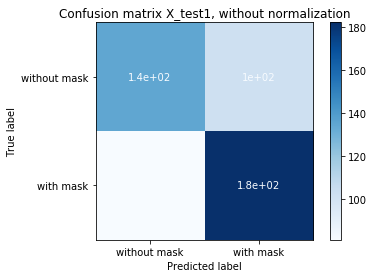

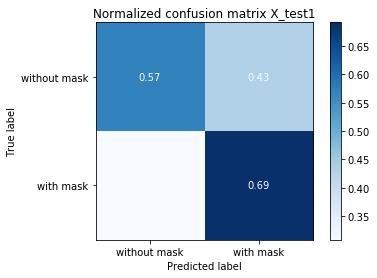

In [17]:
# Confusion Matrix for X_test1
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test1, without normalization", None),
                  ("Normalized confusion matrix X_test1", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test1, y_test1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Confusion matrix X_test2, without normalization
[[125 110]
 [ 84 181]]
Normalized confusion matrix X_test2
[[0.53 0.47]
 [0.32 0.68]]


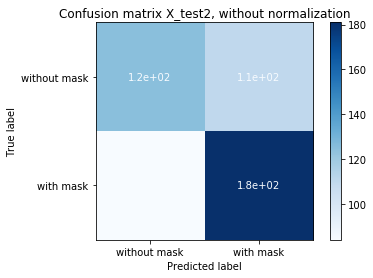

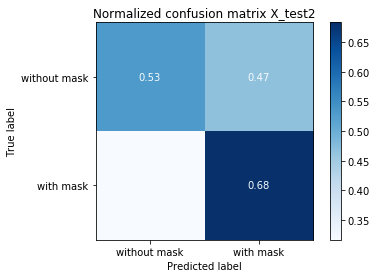

In [18]:
# Confusion Matrix for X_test2
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test2, without normalization", None),
                  ("Normalized confusion matrix X_test2", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test2, y_test2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [19]:
# Accuracy score
from sklearn.metrics import accuracy_score
accs = accuracy_score(y_test2, pred_test1)
print(accs)
print()
accs = accuracy_score(y_test1, pred_test2)
print(accs)

0.612

0.634


In [20]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test2, pred_test1))
print()
print(classification_report(y_test1, pred_test2))

precision    recall  f1-score   support

           0       0.60      0.53      0.56       235
           1       0.62      0.68      0.65       265

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.61      0.61      0.61       500


              precision    recall  f1-score   support

           0       0.62      0.57      0.60       237
           1       0.64      0.69      0.67       263

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500



In [23]:
# # Write output in test_solution.txt
# f = open("ml-fmi-23-2020\\MFCCS + SVC C=1 gamma=0.001 rbf.csv", "w")
# # f.write(str(cm)+str(accs)+"\n")
# f.write("name,label\n")
# for i in range(len(pred2)):
#     string = fileNameTest[i] + "," + str(pred2[i]) + "\n"
#     f.write(string)
# f.close()

In [22]:
# Classification with Logistic Regression
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(C=0.001, penalty='l2') # 0.626 pe simplu
regr.fit(X_train, y_train)  

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Make predictions
pred_test2 = regr.predict(X_test2)
pred_test1 = regr.predict(X_test1)
pred2 = regr.predict(X_test_final)

In [24]:
# Accuracy score
from sklearn.metrics import accuracy_score
accs = accuracy_score(y_test2, pred_test2)
print(accs)
print()
accs = accuracy_score(y_test1, pred_test1)
print(accs)

0.62

0.644


In [25]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test2, pred_test2))
print()
print(classification_report(y_test1, pred_test1))

precision    recall  f1-score   support

           0       0.60      0.57      0.59       235
           1       0.64      0.66      0.65       265

    accuracy                           0.62       500
   macro avg       0.62      0.62      0.62       500
weighted avg       0.62      0.62      0.62       500


              precision    recall  f1-score   support

           0       0.63      0.62      0.62       237
           1       0.66      0.67      0.66       263

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



Confusion matrix X_test1, without normalization
[[146  91]
 [ 87 176]]
Normalized confusion matrix X_test1
[[0.62 0.38]
 [0.33 0.67]]


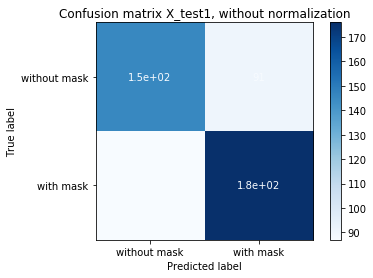

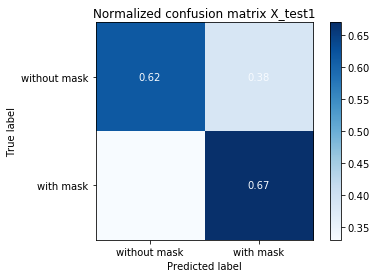

In [26]:
# Confusion Matrix for X_test1
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test1, without normalization", None),
                  ("Normalized confusion matrix X_test1", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test1, y_test1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Confusion matrix X_test2, without normalization
[[134 101]
 [ 89 176]]
Normalized confusion matrix X_test2
[[0.57 0.43]
 [0.34 0.66]]


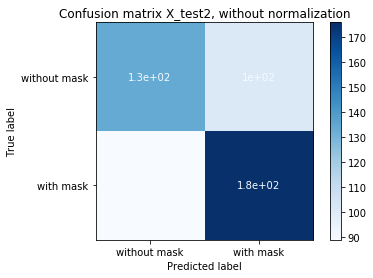

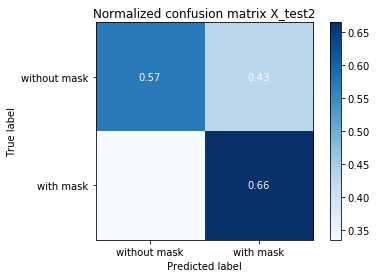

In [27]:
# Confusion Matrix for X_test2
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix X_test2, without normalization", None),
                  ("Normalized confusion matrix X_test2", 'true')]
class_names=['without mask', 'with mask']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(regr, X_test2, y_test2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize, 
                                 values_format=".1f'")
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [41]:
# # Write output in test_solution.txt
# f = open("ml-fmi-23-2020\\MFCCS + LogisticRegression C=0.001, penalty='l2'.csv", "w")
# # f.write(str(cm)+str(accs)+"\n")
# f.write("name,label\n")
# for i in range(len(pred2)):
#     string = fileNameTest[i] + "," + str(pred2[i]) + "\n"
#     f.write(string)
# f.close()